# Problem statement
pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model. 

Note: This is just a snapshot of the data. The datasets can be downloaded from AiSpry LMS in the Hands-On Material section. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\PCA Assignments\heart disease.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#performing k means clustering..

In [8]:

from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

In [9]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,50)
Y = np.random.uniform(0,1,50)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

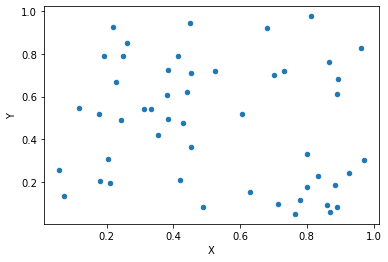

In [10]:
df_xy.plot(x="X", y="Y", kind = "scatter")

In [11]:
model1 = KMeans(n_clusters = 3).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

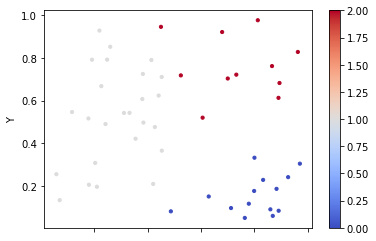

In [12]:
df_xy.plot(x = "X", y = "Y", c = model1.labels_, kind="scatter", s = 10, cmap = plt.cm.coolwarm)

In [13]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)


In [14]:

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:, 1:])

In [15]:
df_norm

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [16]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[283.58678941203533,
 241.66326272648286,
 204.60245164726518,
 189.4248356270527,
 174.11039952611296,
 160.62904501727604,
 150.8441272766904]

Text(0, 0.5, 'total_within_SS')

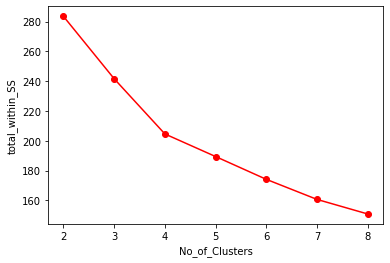

In [17]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")



In [18]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)


KMeans(n_clusters=5)

In [19]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust'] = mb # creating a  new column and assigning it to new column 


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


# performing PCA on the dataset..

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [23]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(df_norm)


In [24]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.33851043, 0.15612633, 0.10568991, 0.10088632, 0.07268353,
       0.05255189])

In [25]:
# PCA weights
pca.components_
pca.components_[0]

array([ 0.30431701, -0.29053375,  0.02936845,  0.00939496,  0.02596376,
       -0.06174351, -0.13177272,  0.51978432,  0.13736207, -0.19908006,
        0.14501454,  0.11675556, -0.6609403 ])

In [26]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([33.85, 49.46, 60.03, 70.12, 77.39, 82.65])

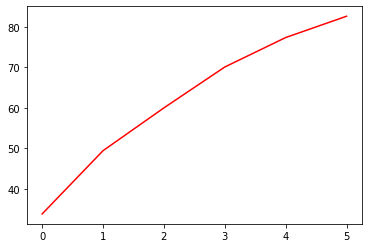

In [27]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")


In [28]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([df.age, pca_data.iloc[:, 0:3]], axis = 1)


In [29]:
final.head()

,age,comp0,comp1,comp2
0,63,-0.440193,-0.496212,0.732643
1,37,-0.375689,-0.361855,0.002951
2,41,-0.783794,0.462106,-0.024808
3,56,-0.531761,-0.439361,-0.340973
4,57,-0.206261,0.877919,-0.659248


0      Text(-0.4401934246575949, -0.4962118876313441,...
1      Text(-0.3756891496297379, -0.3618553737111126,...
2      Text(-0.7837939526913018, 0.4621061800210286, ...
3      Text(-0.5317614082729115, -0.4393607287776013,...
4      Text(-0.20626101107962724, 0.877918614906314, ...
                             ...                        
298    Text(0.6276291097988228, 0.9571842690277472, '...
299    Text(0.1269116589813875, -0.4816702098431507, ...
300    Text(0.5635018751214402, -0.3542081011316199, ...
301    Text(0.9932720461613559, 0.04569310925845973, ...
302    Text(-0.019402642458743943, 0.5306722175457076...
Length: 303, dtype: object

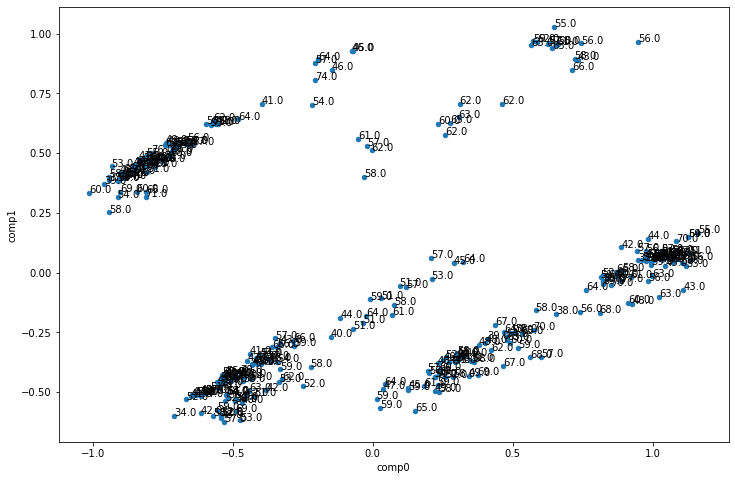

In [30]:
# Scatter diagram
import matplotlib.pylab as plt
ax = final.plot(x='comp0', y='comp1', kind='scatter',figsize=(12,8))
final[['comp0', 'comp1', 'age']].apply(lambda x: ax.text(*x), axis=1)


In [31]:
#performing clustering after PCA..

In [32]:
final.head()

,age,comp0,comp1,comp2
0,63,-0.440193,-0.496212,0.732643
1,37,-0.375689,-0.361855,0.002951
2,41,-0.783794,0.462106,-0.024808
3,56,-0.531761,-0.439361,-0.340973
4,57,-0.206261,0.877919,-0.659248


In [33]:
#performing k means clustering for the PCA dataset..

In [34]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final.iloc[:,1:])
    TWSS.append(kmeans.inertia_)
    
TWSS

[128.80639077961536,
 86.41152933429245,
 61.71923923457588,
 45.09813087422488,
 36.09148191208191,
 29.651673926432856,
 23.37157205500925]

# Scree plot after PCA

Text(0, 0.5, 'total_within_SS')

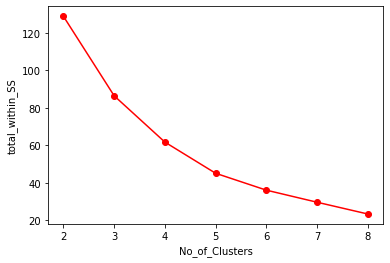

In [35]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [36]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [37]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
final['clust'] = mb # creating a  new column and assigning it to new column 


In [38]:
final.head()

,age,comp0,comp1,comp2,clust
0,63,-0.440193,-0.496212,0.732643,4
1,37,-0.375689,-0.361855,0.002951,0
2,41,-0.783794,0.462106,-0.024808,2
3,56,-0.531761,-0.439361,-0.340973,0
4,57,-0.206261,0.877919,-0.659248,2


In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [40]:
#hence after comparing the the clustering before PCA and after PCA.if PCA is applied before clustering then it mproves the clustering results in practice (noise reduction)...

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='clust'>

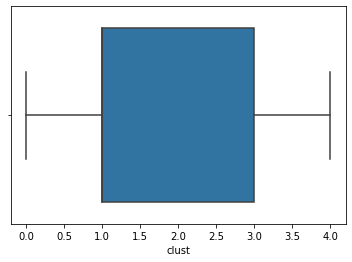

In [42]:
sns.boxplot(x = final["clust"])

<AxesSubplot:xlabel='clust'>

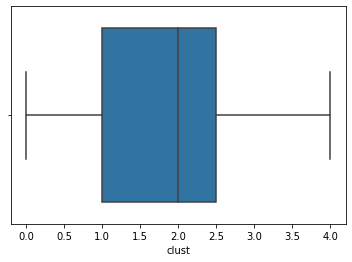

In [43]:
sns.boxplot(x = df["clust"])